<a href="https://colab.research.google.com/github/Nazhan99/Tensorflow_notes/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to regression with neural network in tensorflow



In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
##Create data to view and fit

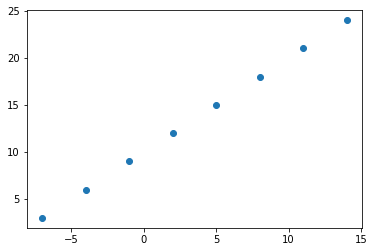

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X= np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y)

In [4]:
y== X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###input and output shapes

In [5]:
#create a demo  tensor for our housing price prediction problem
house_info= tf.constant(["bedroom", 'bathroom', 'garage'])
house_price= tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
#turn numpy array to tensor
X=tf.constant(X)
y=tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape= X[0].shape
output_shape= y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

###Steps in modelling with tensorflow

1. Create a model (define input and output)
2. compiling model (loss function and optimize)
3.  fitting the model (predict the output)

In [11]:
#set random seed
tf.random.set_seed(42)

#1.create a model using the sequential API
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #Stocastic gradient descent
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 586ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
#try and make a predictioons using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

###improving the model


In [13]:
#lets rebuild our model

#1.create the model
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

#2. compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 845ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [14]:
#try and make a predictioons using our model
y_pred=model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [15]:
#create the model (with extra hidden layer)
model= tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

#2. compiling the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 781ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 5ms/step 

In [16]:
model.predict([17.0])

array([[26.58353]], dtype=float32)

###Evaluating the model

In [17]:
#make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
#make label for dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

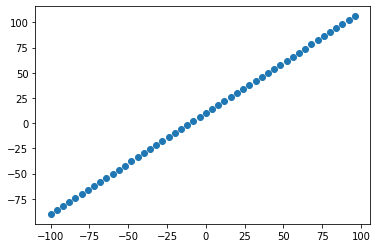

In [19]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### the 3 sets...
* Training set
* Validation set
* Test set

In [20]:
#check the length the set 
len(X)

50

In [21]:
#Split the data into train set
X_Train =X[:40] #first 40  of the data train set
y_Train=y[:40]

X_Test= X[40:] #last 40 of the data test set  
y_Test=y[40:]

len(X_Train), len(X_Test), len(y_Train), len(y_Test)

(40, 10, 40, 10)

###Visualizing the data

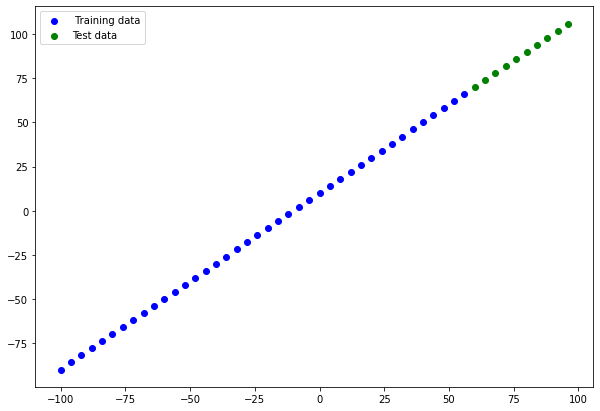

In [22]:
plt.figure(figsize=(10,7))

#plot the training data in blue
plt.scatter(X_Train, y_Train, c="b", label=" Training data")

plt.scatter(X_Test,y_Test, c="g", label="Test data")
plt.legend()

In [24]:
#build neural network model

#1. create a model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

#3. fit the model
#model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

In [25]:
model.summary()

ValueError: ignored

In [30]:
#create a model which automatically build by defining the input_shape argument
tf.random.set_seed(42)

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1, input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [31]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params- total numebr of parameters in the model
*Trainable parameters- these are the parameters/pattern the model can update as it trains.
* Non-Trainable params- parameters that aren't updated during training.